###   -----------------------------Observations for Products Table------------------------------------

### 1. Data Quality Issues

1. Missing Values:

CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4, MANUFACTURER, BRAND, and BARCODE all have missing values.
CATEGORY_4 has a very high percentage of missing values (~94% missing).
MANUFACTURER and BRAND have around 27% missing values.

2. Potential Placeholder Values:

The presence of "PLACEHOLDER MANUFACTURER" in MANUFACTURER suggests that some values might not be actual manufacturers.

3. Data Type Issues:

BARCODE is stored as float64, which is not ideal since barcodes are usually numeric identifiers and should be stored as a string to prevent scientific notation formatting issues.

4. Duplicate Records:

There are 215 (0.03%) duplicate rows, which should be reviewed to determine if they need to be removed.

5. Barcode Formatting Issues:

186 (0.02%) BARCODE values appear more than once, which is unusual since barcodes are typically unique identifiers.
The float64 format may have caused rounding issues, potentially altering some barcode values.

### 2. Examine Data with Python and Data Visualization

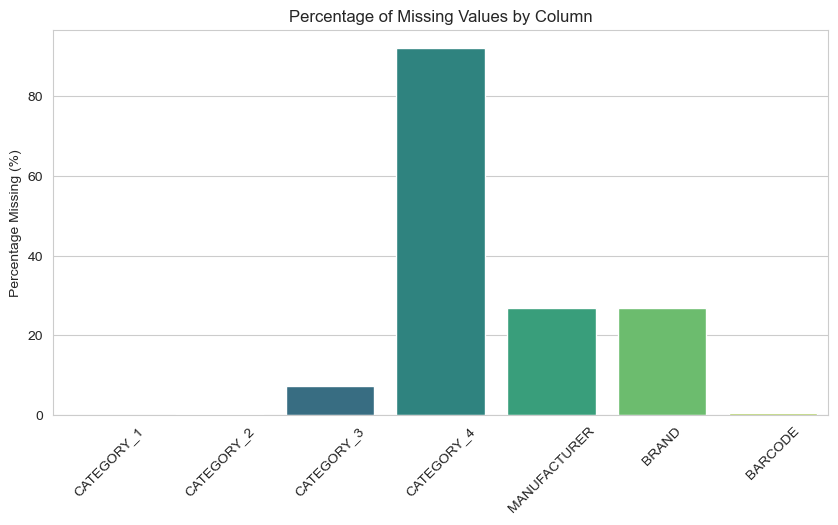

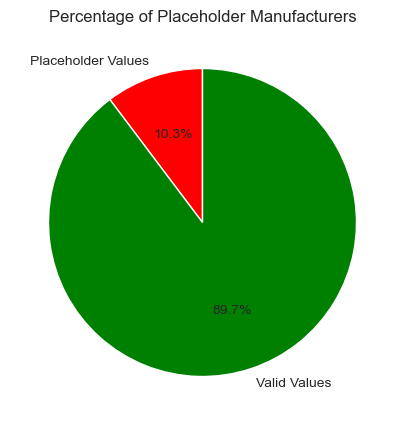

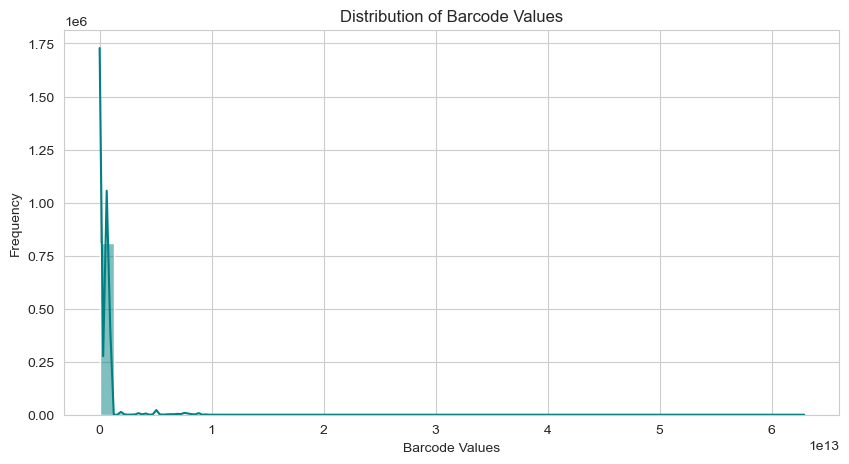

Total duplicate rows: 215 (0.03%)


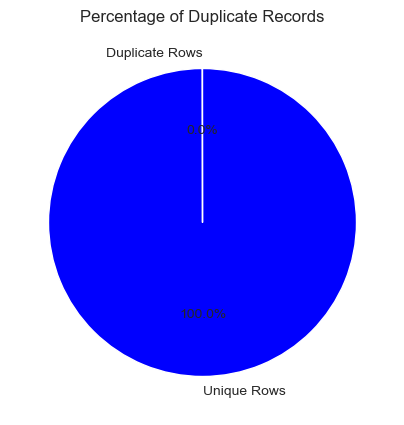

Total duplicated barcodes: 186 (0.02%)


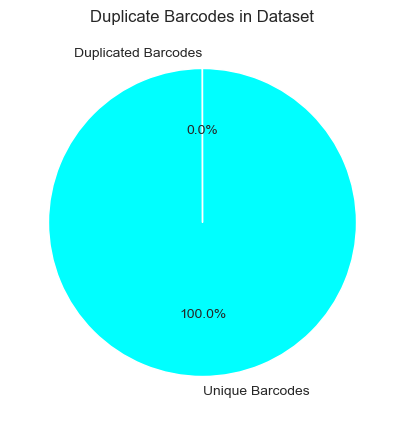

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "PRODUCTS_TAKEHOME.csv" 
df = pd.read_csv(file_path)

# Set Seaborn style
sns.set_style("whitegrid")

### 1. Missing Values Visualization ###
missing_values = df.isnull().sum() / len(df) * 100  # Percentage of missing values

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Percentage Missing (%)")
plt.title("Percentage of Missing Values by Column")
plt.show()

### 2. Placeholder Values in Manufacturer ###
placeholder_counts = df["MANUFACTURER"].str.contains("PLACEHOLDER", na=False).sum()

plt.figure(figsize=(5, 5))
plt.pie([placeholder_counts, len(df) - placeholder_counts], 
        labels=["Placeholder Values", "Valid Values"], 
        autopct='%1.1f%%', colors=["red", "green"], startangle=90)
plt.title("Percentage of Placeholder Manufacturers")
plt.show()

### 3. Barcode Data Type Issues ###
# Convert barcode to string for visualization
df["BARCODE"] = df["BARCODE"].astype(str)

plt.figure(figsize=(10, 5))
sns.histplot(df["BARCODE"].dropna().astype(float), bins=50, kde=True, color="teal")
plt.xlabel("Barcode Values")
plt.ylabel("Frequency")
plt.title("Distribution of Barcode Values")
plt.show()

# 4. Duplicate Records Count
duplicate_count = df.duplicated().sum()
total_rows = len(df)

print(f"Total duplicate rows: {duplicate_count} ({(duplicate_count / total_rows) * 100:.2f}%)")

# Show pie chart only if duplicates exist
if duplicate_count > 0:
    plt.figure(figsize=(5, 5))
    plt.pie([duplicate_count, total_rows - duplicate_count], 
            labels=["Duplicate Rows", "Unique Rows"], 
            autopct='%1.1f%%', colors=["orange", "blue"], startangle=90)
    plt.title("Percentage of Duplicate Records")
    plt.show()
else:
    print("No duplicate records found.")

# 5. Barcode Formatting Issues (Duplicate Barcodes)
barcode_counts = df["BARCODE"].value_counts()
duplicated_barcodes = barcode_counts[barcode_counts > 1].count()
total_unique_barcodes = df["BARCODE"].nunique()

print(f"Total duplicated barcodes: {duplicated_barcodes} ({(duplicated_barcodes / total_unique_barcodes) * 100:.2f}%)")

# Show pie chart only if duplicate barcodes exist
if duplicated_barcodes > 0:
    plt.figure(figsize=(5, 5))
    plt.pie([duplicated_barcodes, total_unique_barcodes - duplicated_barcodes], 
            labels=["Duplicated Barcodes", "Unique Barcodes"], 
            autopct='%1.1f%%', colors=["purple", "cyan"], startangle=90)
    plt.title("Duplicate Barcodes in Dataset")
    plt.show()
else:
    print("No duplicate barcodes found.")


### Challenging fields to Understand

1. Hierarchical Categories (CATEGORY_1 to CATEGORY_4):

The relationship between these levels of categories is unclear. Some records have CATEGORY_4, while others do not.
Need to verify if categories are consistently hierarchical or if there are exceptions.

2. BARCODE Formatting:

Since BARCODE is stored as a floating-point number, it might cause truncation or rounding issues when dealing with long numeric values.